# **Inference Without Assumptions: Detecting and Rewriting Social Bias in Natural Language Inference**







### Submitted By:

* Ariel Soffer (ID: 216163527)
* Katherine Zablianov​​​ (ID:  322981655)
* Shay Yeffet​​ (ID: 301333985)
* Neta Robinzon Butbul (ID: 208541086)


## **Abstract:**

Natural Language Inference (NLI) is the task of determining whether a given conclusion logically follows from a given statement. <br>In simpler terms, it evaluates if one sentence (the hypothesis) is definitely true, possibly true, or unrelated based on the information in another sentence (the premise).<br><br>

Our project focuses on detecting and reducing social bias in Natural Language Inference (NLI), particularly in cases where AI systems make gender-based assumptions without sufficient context.<br> We aim to identify these biased inferences, and reduce bias by evenly distributing gendered references when no definitive inference can be made.<br><br>

We constructed a synthetic dataset of sentence pairs, where the first sentence (the premise) describes a role, someone with a profession, a realitive of other person (mother/nurse/firefighter/cousin,...), and the second sentence (the hypothesis) refers to that entity — using a gendered term (he/she/his/him...).<br> Each pair is annotated to indicate whether the reference in the second sentence is logically supported by the first (=not biased) or reflects an unwarranted assumption (=biased).
<br><br> Using this dataset, we built classification models to distinguish between justified and biased inferences and compared the results of different ones.<br>

To mitigate bias, we developed a rewriting mechanism that revises biased hypotheses (bias=1) by randomly assigning a gender (p = 0.5) and prompting an LLM (chat GPT4o model) to rewrite the hypotheses (only) using that gender, while preserving meaning and logic, and keeping the premise the same.<Br><br>

For evaluation, we embed “man” and “woman” as references, measure cosine distances to each rewritten hypothesis, assign signs (+ for “woman”, − for “man”), and compute the average. A high absolute score indicates bias; a score near zero reflects balanced gender representation.

## **Constructing The Synthetic Dataset For Classification**

In order to construct a dataset that would be suitable for our classification model, **we followed these steps**:

## **1. First, we defined the dataset's structure:**
Our dataset would contains pairs of sentences.
* Sentence 1 (Premise): Describes a person, profession, or role without using any gendered pronouns (words like "he", "she", "her", "his", "herself",...).

* Sentence 2 (Hypothesis): Refers to the person from Sentence 1 using a gendered pronoun (he, she, or they).<br><br>

**Example:** <br>
Sentence 1: My **sister Shelly** is very beautiful.<br>
Sentence 2: **She** works as a model.<br><br>

By using this structure, we aim check whether the gender mentioned in the second sentence can be directly and unambiguously deduced from the first sentence = **the sentence is not biased**, or whether it contains gender inferences (the gender in it can not directly be inferenced from the person in the first sentence) = **the sentence is biased**.<Br><br>

**Example not biased:**<br>
Sentence 1: In the classroom corner, Dana keeps a binder titled “My Brother’s Stories.”<br>
Sentence 2: Her descriptions of Avi’s jokes always make us laugh.<br><br>

**Explanation:**<br>
Sentence 1 refers to “Dana,” a name strongly associated with females. Thus, the pronoun usage (the word "She") is contextually inferable and not biased.
<br><Br>

**Example biased:**<br>
Sentence 1: A person walked into the library holding a stack of books.<br>
Sentence 2: He asked if there was a place to charge his laptop.

**Explanation**:<br>
Sentence 1 uses “a person,” which is entirely gender-neutral and does not provide any cue about the individual’s gender. However, Sentence 2 introduces “he” without justification from the first sentence — this makes it a biased inference based on gender assumption.

## **2. Then, we used prompt engineering to create the dataset**
We gave specific instructions to the generative model "ChatGPT 4o", in order to help it create our dataset.

* At first, we wrote all the details about our project, our goals and all the things to know about our classification synthetic dataset (including examples of valid biased and not biased sentences).<br><br>
Then, we asked the LLM to provide prompt instructuions to give to a generative model that will generate the dataset for us
# **(we used a generative model to give instructions to a generative model)**.

<br><br>
## **The first prompt instructions it returned are:**<br><br>

#Beginning Prompt: (generating 10 pairs)
You are a dataset generator for a contextual gender bias classification task using natural language inference (NLI).

Each data sample consists of:

Sentence 1 (premise): introduces a person or role.

Sentence 2 (hypothesis): refers to that person using a gendered pronoun (he/she/they).

Your task is to generate diverse sentence pairs across a wide variety of real-life categories. Each pair can be:

Not biased: gender is explicitly inferable (e.g., "My mother is a chef." → "She works long hours.")

Biased: gender is assumed without being stated (e.g., "The chef works long hours." → "She often skips dinner.")

🔹 Categories to choose from (rotate between them):

Occupations: nurse, CEO, engineer, janitor, journalist, developer, etc.

Family Roles: sister, cousin, father, parent, child, etc.

Education Roles: teacher, principal, tutor, coach, etc.

Medical: doctor, nurse, therapist, etc.

Leadership: judge, president, director, etc.

Manual/Blue Collar Jobs: mechanic, driver, electrician, etc.

Service Jobs: waiter, receptionist, cleaner, chef, etc.

Sports: athlete, coach, referee, etc.

Military/Law: soldier, pilot, police officer, etc.

Entertainment: actor, dancer, musician, influencer, etc.

Technology: developer, system admin, AI researcher

Politics: senator, mayor, ambassador, diplomat

🔹 Output Requirements:

**Generate 10 sentence pairs per call.**

Vary vocabulary and syntax: include simple, compound, and complex structures.

Use both male, female, and neutral pronouns (he/she/they).

Alternate between biased and non-biased examples (50/50 split).<br><br>

✅ Example Outputs<br><br>
{<br>
  "category": "occupation",<br>
  "premise": "The nurse organized the patients' records carefully.",<br>
  "hypothesis": "She made sure everyone was seen on time.",<br>
}<br><br>
{<br>
  "category": "family",<br>
  "premise": "My brother is a police officer.",<br>
  "hypothesis": "He works night shifts every weekend.",<br>
}<br><br><br>



---


### **As seen above, we wanted the LLM to initially genenared only 10 samples of pairs (so we could check the quality of the sentences).**

It generated 10 **good examples**, so we thought it would also do a great at generating a large number of samples.<br><br>
Therefore, asked it to create a csv file, containing 3500 examples of sentences like those it has generated.<br><br>

We also added more requirements this time, like:
* Adding the requirement for differences between the syntactic structures of sentences, and sentence openings.
* Asking for realistic and natural language in the sentences

#Second prompt
----------------------------------------------

You are a data generator for a contextual reasoning dataset focused on gender pronoun inference.

Your task is to generate 3,500 high-quality sentence pairs, where each pair includes:

Sentence 1 (Premise): Describes a person, profession, or role without using any gendered pronouns.

Sentence 2 (Hypothesis): Refers to the person from Sentence 1 using a gendered pronoun (he, she, or they).

These will be used in a Natural Language Inference (NLI) task to determine if the pronoun is inferable or biased.

each one of the sentences will be different from one another, start in different words, and refer to somebody else. Not all of the second sentences(Hypothesis) will start with a gendered word (he, she,...), but only some of them. Use diverse gender words, like he, she, his, her, him,...

In order to generate completely different sentences, please use some sentences from different sources on the internet.

🔹 Generation Instructions:
1. Diversity of Content:
Rotate and mix examples from the following categories:

Occupations (e.g., doctor, janitor, firefighter, CEO)

Education (e.g., tutor, principal, student)

Technology (e.g., developer, AI expert)

Service roles (e.g., cleaner, waiter)

Leadership (e.g., manager, judge, captain)

Family/Relatives (e.g., sister, uncle, cousin, parent)

Sports (e.g., athlete, coach, referee)

Entertainment (e.g., actor, musician)

Law & Military (e.g., police officer, pilot)

Medical (e.g., surgeon, therapist)

Politics (e.g., mayor, senator)

2. Vary Sentence Structure and Style:
Use a mix of formal and informal tones.

Use diverse sentence structures: statements, compound/complex sentences, dialogue-style, descriptive, etc.

Vary sentence openings:

Not every sentence should begin with “A…” or “The…”.

Use personal and relational contexts (e.g., “My cousin…”, “Our principal…”, “That musician…”).

Use named characters occasionally (e.g., “Jordan is a firefighter…”).

Use realistic and natural language, as if the sentences appeared in news articles, conversations, or reports.<br>




---


### **However, it worked poorly and generated many similar (almost the same) sentences, such as:<br>**
"Everyone expected the manager to lead, but it was a quiet father in the back who offered the most logical path forward."<br><Br>
This sentence appeared 200 times (out of 3500 samples), each time with a diferent noun (here the word father).<br>

In literature, it was written that **smaller missions work better than bigger ones**.<br> Therefore, we generated almost 3500 samples, **when each time, we asked ChatGPT 4o to only generate 30.** It did actually help, and this time, all the sentences were different from one another and well structured.<br><br>

In addition, this way, we could check its samples one by one and make sure everything is well made and balanced.<Br> For instance, we noticed that many of the premise sentences (first sentences) started with the noun (like in the sentence: **Mary** goes to the beach at least once a week), so we instructed ChatGPT to generate more unique stractured sentences, like:<br><br>
Sentence 1: **"Even during the blackout**, the data analyst found a way to export the report."
<br>Sentence 2: "She finished it by candlelight."



---


#Small prompts we wrote for this purpose: <br>
###**Prompt 1:**
* now start from the beginning: generate 100 sentences with different structures (some start with the person spoken about, and some not), different gender words in the "sentence 2" sentences (he,she, he's, her's, her, his, him,...) and many occupations, and family terms (such as cousin, sister, brother, father, sibling, grandma, ...).

**(purpose: this was the first reduction of the amount of sentences we required it to generate)**

###**Prompt 2:**
* please write 30 sentences (not in csv)

**(purpose: the 100 sentences generation did not work, so we moved dowm to 30)**

###**Prompt 3:**
* continue generating sentences 101-130, but remember to start a part of them in the person spoken about, but others with other beginnings

**(purpose: making sure there is diversity)**

###**Prompt 4:**
*  remember that a profession, a family relative, or some other person is referred/mentioned only in the first sentence, and the gender term is mentioned only in the second one


**(when we wrote it: when it generated sentences without a person reference in the first sentence, like: <br>
Sentence 1: The courtroom walls were covered in sketches from youth art programs.
Sentence 2: The judge said his court should include all voices.
)**



## **3. Labeling the dataset + Preprocessing Steps**

In order to label the sentences to biased/ not biased, we initially asked ChatGPT 4o to label them according to our general instructions, but it didn't work well, and many mistakes were made.<br><br>

So instead of wasting time on labeling the sentences sample by sample, we thought of a smart way to label them correctly and efficiently.<br><br>

To label sentence pairs for contextual gender bias, we used two lists:<br>
* one of gendered family roles (e.g., aunt, father, sister)
* and one of gender-specific names (e.g., Lily, Sean).<br>

These lists were made based on the gendered family roles and gendered names from our dataset. <br>We collected all these terms and built these lists with help of GPT-4o. <br><br>

Our approach was that if one of these terms appears in the first sentence (premise), they clearly indicate the gender in the second sentence.<br>
Therefore, for each sample, we checked if Sentence 1 (the premise) contained any term from these lists.
* If it did, the gender in Sentence 2 was considered contextually justified, and the pair was labeled as not biased (bias_label = 0).
* Otherwise, if a gendered term appeared in Sentence 2 without clear context in Sentence 1, the pair was labeled as biased (bias_label = 1).<br><br>

**For example:**<br>
“My **mother** is a great person. She is always so nice to everyone.”<br>
It is labeled not biased, since “mother” clearly implies female gender.<br><br>

## The whole process of labeling the dataset is in the following notebook (also appears in this github as the file: NLPPreparingDataset.ipynb):
[Labeling notebook](https://drive.google.com/file/d/1vW6A5PwQGTEkp6LxiAOwtvJSWDQVsfED/view?usp=sharing)




#### **That way we created a unique, organized and accurate dataset and labeled it, using synthetic data and a generative model**



## **Downloading our pairs dataset and learning statistics**

* First, we get an access to our drive, where the labeled dataset is in.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


using gpu

In [2]:
import torch
# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [3]:
import os
dir_path = dir_path = '/content/drive/MyDrive/'
os.listdir(dir_path)
print(dir_path)

/content/drive/MyDrive/


In [4]:
# loading our dataset
import pandas as pd
df = pd.read_csv(dir_path+ "/labeled_dataset1.csv")

### Now we will observe how maby samples are there in our final dataset after all preprocessing.

In [5]:
#plotting the number of sentence pairs we have
print("we have a total of " ,len(df), "pairs of sentences in the dataset")

we have a total of  3421 pairs of sentences in the dataset


In [6]:
df.head()

,Sentence1,Sentence2,bias_label
0,My cousin opened a tiny repair shop near the t...,He's been fixing watches since childhood.,1.0
1,"From the back of the classroom, the teacher wa...",Her patience was endless.,1.0
2,Few knew that my grandma had once worked as a ...,She never talked about her broadcasting days.,0.0
3,"The firefighter, soaked in sweat, emerged with...",His bravery stunned the crowd.,1.0
4,There's a chef in our neighborhood who never r...,People admire his creativity.,1.0


In [7]:
#checking column names
df.columns

Index(['Sentence1', 'Sentence2', 'bias_label'], dtype='object')

### **Dropping missing values:**
To prepare the dataset for training and evaluation, we will first remove any missing values and ensure that the label column is cast to integer type.

In [8]:
df = df.dropna()
df["bias_label"] = df["bias_label"].astype(int)

<ipython-input-8-1751358384>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bias_label"] = df["bias_label"].astype(int)


In [9]:
#plotting the number of sentence pairs we have after dropping nulls
print("we have a total of " ,len(df), "pairs of sentences in the dataset after dropping nulls")

we have a total of  3419 pairs of sentences in the dataset after dropping nulls


### **Data Distribution:**


In [10]:
print(df.columns)
print(print(df['bias_label'].value_counts()))

Index(['Sentence1', 'Sentence2', 'bias_label'], dtype='object')
bias_label
0    1760
1    1659
Name: count, dtype: int64
None


and in percent:

In [34]:
print(df['bias_label'].value_counts(normalize=True) * 100)

bias_label
0    51.47704
1    48.52296
Name: proportion, dtype: float64


#### **this shows our dataset is balanced and we can work with it efficiently!**

### **Now lets observe the distribution of sentence length in our dataset:**

Sentence 1 length:
count    3419.000000
mean       11.846446
std         3.106665
min         5.000000
25%        10.000000
50%        11.000000
75%        13.000000
max        27.000000
Name: len1, dtype: float64

Sentence 2 length:
count    3419.000000
mean        7.171688
std         2.122783
min         3.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        22.000000
Name: len2, dtype: float64


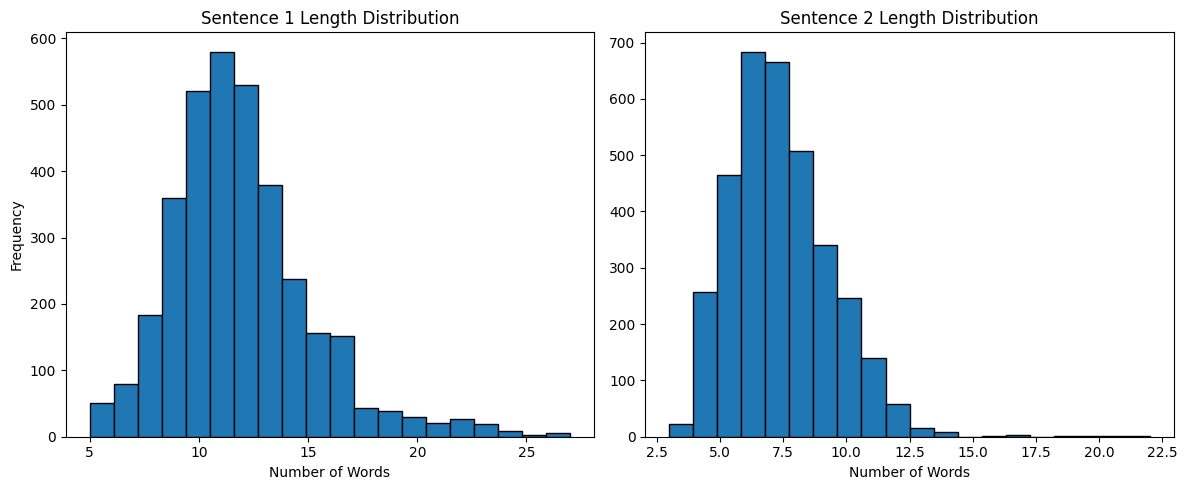

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


# Compute lengths
df['len1'] = df['Sentence1'].apply(lambda x: len(str(x).split()))
df['len2'] = df['Sentence2'].apply(lambda x: len(str(x).split()))

# Summary statistics
print("Sentence 1 length:")
print(df['len1'].describe())
print("\nSentence 2 length:")
print(df['len2'].describe())

# Plot histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['len1'], bins=20, edgecolor='black')
plt.title("Sentence 1 Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(df['len2'], bins=20, edgecolor='black')
plt.title("Sentence 2 Length Distribution")
plt.xlabel("Number of Words")

plt.tight_layout()
plt.show()


#### The sentence lengths are varied, providing strength and diversity to our dataset.

# **Building the Classification Model**

# Fine-Tuning Approach

In almost every field, from deep learning and machine learning to NLP, transfer learning through fine-tuning is a useful powerful technique to enhance model accuracy, efficiency, and overall performance.

The core idea behind transfer learning is to leverage pre-trained models that have already been trained on large, diverse datasets—and adapt them to specific tasks. <Br><Br>By fine-tuning these models on our dataset, we can significantly reduce training time and computational costs while benefiting from the rich feature representations learned during the original training process.

## In our project:
In our project, we apply fine-tuning to pre-trained transformer models (Sbert) to detect gender bias in Natural Language Inference (NLI) tasks.<br> Specifically, we work with sentence pairs. Our goal is to classify whether the second sentence in each pair contains a justified or biased gender reference.



## **Classification Models We will Build And compare:**
* SBERT (Sentence-BERT) Classifier with logistic regression - with different freezing strategies.
* Generative Model Baseline (GPT-3.5 / GPT-4o)


# **Fine Tuning Sentence Bert (Sbert) Model:**

We selected Sentence-BERT (SBERT) for fine-tuning because it is specifically designed to handle sentence pair classification tasks, making it well-suited to our dataset format.<br><br> Each example in our task consists of two sentences:<br>
* the first introduces a person or role in a gender-neutral way
* the second includes a gendered reference.<br><br> This setup closely resembles Natural Language Inference (NLI) tasks, where models must reason about the relationship between two sentences.<br> SBERT was originally trained on large-scale NLI datasets, enabling it to capture semantic relationships between sentence pairs.<br><br> By fine-tuning SBERT with a classification layer on our bias-labeled data, we can leverage its strong understanding of inter-sentence logic to detect when gendered references are contextually justified or potentially biased.



In [11]:
# imports
!pip install transformers datasets evaluate --quiet

import pandas as pd
from datasets import Dataset
import numpy as np

from transformers import (
    BertTokenizerFast,
    BertForSequenceClassification,
    Trainer,
    TrainingArguments,
    DataCollatorWithPadding,
    EvalPrediction,
    EarlyStoppingCallback,
    AutoTokenizer
)
from datasets import load_dataset, Dataset
import evaluate


### Defining model and standard hyperparameters

In [12]:
# === CONFIG ===
MODEL_NAME = "sentence-transformers/all-mpnet-base-v2"
RUN_NAME = "bert_bias_run1"
NUM_LABELS = 2
NUM_EPOCHS = 5
BATCH_SIZE = 16
LEARNING_RATE = 2e-5
LOGGING_STEPS = 10

SAVE_DIR = f"./results/{RUN_NAME}"
os.makedirs(SAVE_DIR, exist_ok=True)

In [13]:
print(df.columns)

Index(['Sentence1', 'Sentence2', 'bias_label'], dtype='object')


### Changing the column names in our dataset to be: "premise" , "hypothesis","label".

In [14]:
# Renaming columns
df = df.rename(columns={
    "Sentence1": "premise",
    "Sentence2": "hypothesis",
    "bias_label": "label"
})

# Checking result
print("new columns are: ", df.columns)

new columns are:  Index(['premise', 'hypothesis', 'label'], dtype='object')


### **Splitting to train and test:**

We will perform a two-stage stratified split:<br> first, we divide the dataset into a training+validation set (85%) and a test set (15%), preserving the label distribution.<br> Next, we further split the training+validation portion into a training set (approximately 70%) and a validation set (15%), again using stratified sampling to maintain class balance.<br><br> Finally, we convert all three subsets—train, validation, and test—into Hugging Face Dataset objects for compatibility with transformer-based training workflows.

In [15]:
# Split
from sklearn.model_selection import train_test_split

# Step 2: First split into train+val and test (85% train+val, 15% test)
train_val_df, test_data = train_test_split(df, test_size=0.15, stratify=df["label"], random_state=42)

# Step 3: Split train+val into train and val
train_data, val_data = train_test_split(train_val_df, test_size=0.176, stratify=train_val_df["label"], random_state=42)
# 0.176 ≈ 15% / 85%

# Convert to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_data)
val_dataset = Dataset.from_pandas(val_data)
test_dataset = Dataset.from_pandas(test_data)


### Loading the tokenizer: (sbert tokenizer)

In [16]:
tokenizer1 = AutoTokenizer.from_pretrained(MODEL_NAME)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


## **Tokenize our data:**
To prepare the dataset for training, we tokenized each sentence pair using a tokenizer that processes the "premise" and "hypothesis" fields with truncation and padding. After tokenization, we removed the original text columns and converted the dataset to PyTorch format for efficient model training.

In [17]:
def tokenize_function(example):
    return tokenizer1(example["premise"], example["hypothesis"], truncation=True, padding="max_length")


train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

train_dataset = train_dataset.remove_columns(["premise", "hypothesis", "__index_level_0__"])
val_dataset = val_dataset.remove_columns(["premise", "hypothesis", "__index_level_0__"])
test_dataset = test_dataset.remove_columns(["premise", "hypothesis", "__index_level_0__"])


train_dataset.set_format("torch")
val_dataset.set_format("torch")
test_dataset.set_format("torch")


Map:   0%|          | 0/2394 [00:00<?, ? examples/s]

Map:   0%|          | 0/512 [00:00<?, ? examples/s]

Map:   0%|          | 0/513 [00:00<?, ? examples/s]

## **Function to display results of classifier models (computing and displaying metrics):**
This "compute_metrics" function calculates accuracy, precision, recall, and F1 score using the predicted and true labels, enabling a comprehensive evaluation of the model's classification performance. We will use it later to observe results.

In [18]:
accuracy = evaluate.load("accuracy")
precision = evaluate.load("precision")
recall = evaluate.load("recall")
f1 = evaluate.load("f1")


def compute_metrics(p: EvalPrediction):
    preds = np.argmax(p.predictions, axis=1)
    return {
        "accuracy": accuracy.compute(predictions=preds, references=p.label_ids)["accuracy"],
        "precision": precision.compute(predictions=preds, references=p.label_ids, average="weighted")["precision"],
        "recall": recall.compute(predictions=preds, references=p.label_ids, average="weighted")["recall"],
        "f1": f1.compute(predictions=preds, references=p.label_ids, average="weighted")["f1"],
    }


### **Defining training configuration**

In [19]:
from transformers import TrainingArguments

def get_training_args(save_dir, batch_size=16, lr=2e-5):
    return TrainingArguments(
        output_dir=save_dir,
        overwrite_output_dir=True,
        eval_strategy="epoch",
        save_strategy="epoch",
        learning_rate=lr,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size,
        num_train_epochs=5,
        weight_decay=0.01,
        logging_dir=f"{save_dir}/logs",
        logging_steps=10,
        load_best_model_at_end=True,
        metric_for_best_model="eval_f1",
        save_total_limit=1,
        report_to="none"
    )

### **Defining trainer setup**

In [20]:
def trainer_setup(model, save_dir):
    return Trainer(
        model=model,
        args=get_training_args(save_dir),
        train_dataset=train_dataset,
        eval_dataset=val_dataset,  # Validation during training
        tokenizer=tokenizer1,
        data_collator=DataCollatorWithPadding(tokenizer1),
        compute_metrics=compute_metrics,
        callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
    )

### **Training Function**
This function handles the training process using a Hugging Face Trainer while measuring the total training time in minutes. After training, it prints evaluation results for each epoch, including evaluation loss, F1 score, and accuracy, allowing us to monitor the model’s performance over time.

In [21]:
import time

def training_func_and_results(trainer):
    print("Training with epoch timing...")
    start_train = time.time()

    trainer.train(resume_from_checkpoint=False)

    end_train = time.time()
    print(f"Total training time: {(end_train - start_train)/60:.2f} minutes\n")

    # Print epoch logs
    print("Epoch-wise Evaluation Results:")
    for log in trainer.state.log_history:
        if 'eval_loss' in log:
            epoch = int(log['epoch'])
            eval_loss = log.get('eval_loss')
            f1 = log.get('eval_f1')
            acc = log.get('eval_accuracy')
            print(f"Epoch {epoch}: Eval Loss={eval_loss:.4f}, F1={f1:.4f}, Accuracy={acc:.4f}")


## **Freezing Layers**
Freezing a layer means not updating its weights while training the model.

Why is it helpful?
1. It can significantly reduce the training time (Instead of retraining the entire model, which can be computationally expensive, you only train the new layers added for your specific task)

2. It helps in preventing overfitting. By not updating the weights of the frozen layers, you avoid tweaking features that are already well-established and generalize well across different tasks.

Since our dataset of sentence pairs is very different from the data that SBert was pretrained on (such as SNLI and MNLI, which focus on logical entailment between regular sentence pairs - without any relation to gender bias), we are going to try and freeze different layers of the data and check what performs better:

* First, we will freeze some of the front (first) layers, and train the last ones, in order to use general features learned by the pre-trained model, but learn more complex patterns and behaviors from the MRI data.
* Then we will freeze more layers
* Finally, we will freeze all layers, and train only the classification head.

In [22]:
def freeze_sbert_layers(model, freeze_ratio=0.5, freeze_embeddings=False):
    encoder = model.base_model  # works for RoBERTa, BERT, etc.

    try:
        layers = encoder.encoder.layer  # works for most transformer-based models
    except AttributeError:
        raise ValueError("Cannot access encoder layers — is this a supported SBERT model?")

    total_layers = len(layers)
    num_to_freeze = int(total_layers * freeze_ratio)

    # Freeze bottom `num_to_freeze` layers
    for idx, layer in enumerate(layers):
        if idx < num_to_freeze:
            for param in layer.parameters():
                param.requires_grad = False

    if freeze_embeddings:
        for param in encoder.embeddings.parameters():
            param.requires_grad = False

    print(f"Frozen {num_to_freeze}/{total_layers} encoder layers")
    if freeze_embeddings:
        print("Embeddings are frozen")


### Model 1 - freezing 25% of the layers
First, we are going to freeze about a quarter of the layers (using the function "freeze_sbert_layers" with the ratio 0.25)


In [23]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

# Use SBERT checkpoint (e.g., trained on NLI)
model_name = "sentence-transformers/all-mpnet-base-v2"

# Load as a Hugging Face model — note: it's RoBERTa architecture under the hood
sbert_model_25 = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)
tokenizer_sbert_25 = AutoTokenizer.from_pretrained(model_name)

# Move to CUDA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
sbert_model_25.to(device)

freeze_sbert_layers(sbert_model_25, freeze_ratio=0.25)

Some weights of MPNetForSequenceClassification were not initialized from the model checkpoint at sentence-transformers/all-mpnet-base-v2 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Frozen 3/12 encoder layers


In [24]:
trainer1 = trainer_setup(sbert_model_25, "./drive/MyDrive/saved_models/finetuned_bias_25_sbert")
training_func_and_results(trainer1)
# Evaluate on test set
test_results1 = trainer1.evaluate(test_dataset)

<ipython-input-20-1889067268>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  return Trainer(


Training with epoch timing...


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.161600,0.118041,0.974609,0.974775,0.974609,0.974599
2,0.100100,0.107576,0.974609,0.974775,0.974609,0.974599
3,0.088400,0.102495,0.978516,0.978574,0.978516,0.978511
4,0.050200,0.097552,0.976562,0.976668,0.976562,0.976555
5,0.064200,0.101155,0.974609,0.974775,0.974609,0.974599


Total training time: 11.31 minutes

Epoch-wise Evaluation Results:
Epoch 1: Eval Loss=0.1180, F1=0.9746, Accuracy=0.9746
Epoch 2: Eval Loss=0.1076, F1=0.9746, Accuracy=0.9746
Epoch 3: Eval Loss=0.1025, F1=0.9785, Accuracy=0.9785
Epoch 4: Eval Loss=0.0976, F1=0.9766, Accuracy=0.9766
Epoch 5: Eval Loss=0.1012, F1=0.9746, Accuracy=0.9746


In [25]:
print("Test Results:", test_results1)

Test Results: {'eval_loss': 0.10651005059480667, 'eval_accuracy': 0.9746588693957114, 'eval_precision': 0.9752195660090397, 'eval_recall': 0.9746588693957114, 'eval_f1': 0.9746380246503812, 'eval_runtime': 9.9267, 'eval_samples_per_second': 51.679, 'eval_steps_per_second': 3.324, 'epoch': 5.0}


In [26]:
# Set the directory where to save the model
SAVE_PATH1 = "./drive/MyDrive/saved_models/finetuned_bias_25_sbert"

# Save the model, tokenizer, and config
trainer1.save_model(SAVE_PATH1)
tokenizer_sbert_25.save_pretrained(SAVE_PATH1)

('./drive/MyDrive/saved_models/finetuned_bias_25_sbert/tokenizer_config.json',
 './drive/MyDrive/saved_models/finetuned_bias_25_sbert/special_tokens_map.json',
 './drive/MyDrive/saved_models/finetuned_bias_25_sbert/vocab.txt',
 './drive/MyDrive/saved_models/finetuned_bias_25_sbert/added_tokens.json',
 './drive/MyDrive/saved_models/finetuned_bias_25_sbert/tokenizer.json')

In [27]:
results_df25 = pd.DataFrame([test_results1])  # test_results is from trainer.evaluate(test_dataset)
results_df25.to_csv("./results/eval_results_25.csv", index=False)

In [28]:
sbert_model_25 = BertForSequenceClassification.from_pretrained("./drive/MyDrive/saved_models/finetuned_bias_25_sbert")
tokenizer_sbert_25 = BertTokenizerFast.from_pretrained("./drive/MyDrive/saved_models/finetuned_bias_25_sbert")

You are using a model of type mpnet to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ./drive/MyDrive/saved_models/finetuned_bias_25_sbert and are newly initialized: ['bert.embeddings.LayerNorm.bias', 'bert.embeddings.LayerNorm.weight', 'bert.embeddings.position_embeddings.weight', 'bert.embeddings.token_type_embeddings.weight', 'bert.embeddings.word_embeddings.weight', 'bert.encoder.layer.0.attention.output.LayerNorm.bias', 'bert.encoder.layer.0.attention.output.LayerNorm.weight', 'bert.encoder.layer.0.attention.output.dense.bias', 'bert.encoder.layer.0.attention.output.dense.weight', 'bert.encoder.layer.0.attention.self.key.bias', 'bert.encoder.layer.0.attention.self.key.weight', 'bert.encoder.layer.0.attention.self.query.bias', 'bert.encoder.layer.0.attention.self.query.weight', 'bert.encoder.layer.0.attention.self.value.bias

### Model 2 - freezing 50% of the layers
using the function "freeze_sbert_layers" with the ratio 0.5

In [29]:
# Load as a Hugging Face model — note: it's RoBERTa architecture under the hood
sbert_model_50 = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)
tokenizer_sbert_50 = AutoTokenizer.from_pretrained(model_name)

# Move to CUDA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
sbert_model_50.to(device)

freeze_sbert_layers(sbert_model_50, freeze_ratio=0.5)

Some weights of MPNetForSequenceClassification were not initialized from the model checkpoint at sentence-transformers/all-mpnet-base-v2 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Frozen 6/12 encoder layers


In [30]:
trainer2 = trainer_setup(sbert_model_50, "./drive/MyDrive/saved_models/finetuned_bias_50_sbert")
training_func_and_results(trainer2)
# Evaluate on test set
test_results2 = trainer2.evaluate(test_dataset)

Training with epoch timing...


<ipython-input-20-1889067268>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  return Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.159800,0.117357,0.974609,0.974775,0.974609,0.974599
2,0.099900,0.107000,0.974609,0.974775,0.974609,0.974599
3,0.095900,0.101979,0.974609,0.974775,0.974609,0.974599


Total training time: 6.55 minutes

Epoch-wise Evaluation Results:
Epoch 1: Eval Loss=0.1174, F1=0.9746, Accuracy=0.9746
Epoch 2: Eval Loss=0.1070, F1=0.9746, Accuracy=0.9746
Epoch 3: Eval Loss=0.1020, F1=0.9746, Accuracy=0.9746


In [31]:
print("Test Results:", test_results2)

Test Results: {'eval_loss': 0.11383241415023804, 'eval_accuracy': 0.9746588693957114, 'eval_precision': 0.9752195660090397, 'eval_recall': 0.9746588693957114, 'eval_f1': 0.9746380246503812, 'eval_runtime': 9.8584, 'eval_samples_per_second': 52.037, 'eval_steps_per_second': 3.347, 'epoch': 3.0}


In [32]:
results_df50 = pd.DataFrame([test_results2])  # test_results is from trainer.evaluate(test_dataset)
results_df50.to_csv("./results/eval_results_50.csv", index=False)

In [33]:
# Set the directory where to save the model
SAVE_PATH2 = "./drive/MyDrive/saved_models/finetuned_bias_50_sbert"

# Save the model, tokenizer, and config
trainer2.save_model(SAVE_PATH2)
tokenizer_sbert_50.save_pretrained(SAVE_PATH2)

('./drive/MyDrive/saved_models/finetuned_bias_50_sbert/tokenizer_config.json',
 './drive/MyDrive/saved_models/finetuned_bias_50_sbert/special_tokens_map.json',
 './drive/MyDrive/saved_models/finetuned_bias_50_sbert/vocab.txt',
 './drive/MyDrive/saved_models/finetuned_bias_50_sbert/added_tokens.json',
 './drive/MyDrive/saved_models/finetuned_bias_50_sbert/tokenizer.json')

In [34]:
sbert_model_50 = BertForSequenceClassification.from_pretrained("./drive/MyDrive/saved_models/finetuned_bias_50_sbert")
tokenizer_sbert_50 = BertTokenizerFast.from_pretrained("./drive/MyDrive/saved_models/finetuned_bias_50_sbert")

You are using a model of type mpnet to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ./drive/MyDrive/saved_models/finetuned_bias_50_sbert and are newly initialized: ['bert.embeddings.LayerNorm.bias', 'bert.embeddings.LayerNorm.weight', 'bert.embeddings.position_embeddings.weight', 'bert.embeddings.token_type_embeddings.weight', 'bert.embeddings.word_embeddings.weight', 'bert.encoder.layer.0.attention.output.LayerNorm.bias', 'bert.encoder.layer.0.attention.output.LayerNorm.weight', 'bert.encoder.layer.0.attention.output.dense.bias', 'bert.encoder.layer.0.attention.output.dense.weight', 'bert.encoder.layer.0.attention.self.key.bias', 'bert.encoder.layer.0.attention.self.key.weight', 'bert.encoder.layer.0.attention.self.query.bias', 'bert.encoder.layer.0.attention.self.query.weight', 'bert.encoder.layer.0.attention.self.value.bias

### Model 3 - freezing all layers, except Classifier Head
using the function "freeze_sbert_layers" with the ratio 1

In [35]:
# Load as a Hugging Face model — note: it's RoBERTa architecture under the hood
sbert_model_100 = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)
tokenizer_sbert_100 = AutoTokenizer.from_pretrained(model_name)

# Move to CUDA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
sbert_model_100.to(device)

freeze_sbert_layers(sbert_model_100, freeze_ratio=1)

Some weights of MPNetForSequenceClassification were not initialized from the model checkpoint at sentence-transformers/all-mpnet-base-v2 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Frozen 12/12 encoder layers


In [36]:
trainer3 = trainer_setup(sbert_model_100, "./drive/MyDrive/saved_models/finetuned_bias_100_sbert")
training_func_and_results(trainer3)
# Evaluate on test set
test_results3 = trainer3.evaluate(test_dataset)

Training with epoch timing...


<ipython-input-20-1889067268>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  return Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.644600,0.632155,0.833984,0.838270,0.833984,0.833796
2,0.602100,0.580412,0.869141,0.869528,0.869141,0.869172
3,0.563600,0.539682,0.869141,0.869528,0.869141,0.869172
4,0.501900,0.515416,0.869141,0.869361,0.869141,0.869168


Total training time: 7.84 minutes

Epoch-wise Evaluation Results:
Epoch 1: Eval Loss=0.6322, F1=0.8338, Accuracy=0.8340
Epoch 2: Eval Loss=0.5804, F1=0.8692, Accuracy=0.8691
Epoch 3: Eval Loss=0.5397, F1=0.8692, Accuracy=0.8691
Epoch 4: Eval Loss=0.5154, F1=0.8692, Accuracy=0.8691


In [37]:
print("Test Results:", test_results3)

Test Results: {'eval_loss': 0.5859116911888123, 'eval_accuracy': 0.847953216374269, 'eval_precision': 0.847953216374269, 'eval_recall': 0.847953216374269, 'eval_f1': 0.847953216374269, 'eval_runtime': 9.8775, 'eval_samples_per_second': 51.936, 'eval_steps_per_second': 3.341, 'epoch': 4.0}


In [38]:
results_df100 = pd.DataFrame([test_results3])  # test_results is from trainer.evaluate(test_dataset)
results_df100.to_csv("./results/eval_results_100.csv", index=False)

In [39]:
# Set the directory where to save the model
SAVE_PATH3 = "./drive/MyDrive/saved_models/finetuned_bias_100_sbert"

# Save the model, tokenizer, and config
trainer3.save_model(SAVE_PATH3)
tokenizer_sbert_100.save_pretrained(SAVE_PATH3)

('./drive/MyDrive/saved_models/finetuned_bias_100_sbert/tokenizer_config.json',
 './drive/MyDrive/saved_models/finetuned_bias_100_sbert/special_tokens_map.json',
 './drive/MyDrive/saved_models/finetuned_bias_100_sbert/vocab.txt',
 './drive/MyDrive/saved_models/finetuned_bias_100_sbert/added_tokens.json',
 './drive/MyDrive/saved_models/finetuned_bias_100_sbert/tokenizer.json')

In [40]:
sbert_model_100 = BertForSequenceClassification.from_pretrained("./drive/MyDrive/saved_models/finetuned_bias_100_sbert")
tokenizer_sbert_100 = BertTokenizerFast.from_pretrained("./drive/MyDrive/saved_models/finetuned_bias_100_sbert")

You are using a model of type mpnet to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ./drive/MyDrive/saved_models/finetuned_bias_100_sbert and are newly initialized: ['bert.embeddings.LayerNorm.bias', 'bert.embeddings.LayerNorm.weight', 'bert.embeddings.position_embeddings.weight', 'bert.embeddings.token_type_embeddings.weight', 'bert.embeddings.word_embeddings.weight', 'bert.encoder.layer.0.attention.output.LayerNorm.bias', 'bert.encoder.layer.0.attention.output.LayerNorm.weight', 'bert.encoder.layer.0.attention.output.dense.bias', 'bert.encoder.layer.0.attention.output.dense.weight', 'bert.encoder.layer.0.attention.self.key.bias', 'bert.encoder.layer.0.attention.self.key.weight', 'bert.encoder.layer.0.attention.self.query.bias', 'bert.encoder.layer.0.attention.self.query.weight', 'bert.encoder.layer.0.attention.self.value.bia

## **Results And Insights:**

1. The models performed extremely well (up to ~97.8% accuracy), likely because our task—classifying sentence pairs—is very similar to the NLI tasks SBERT was originally trained on. This similarity made it easy for the model to adapt with minimal fine-tuning.<br><br>

1. Both the 25% and 50% frozen-layer models reached nearly identical validation and test metrics.<br>
Therefore, we can infer that the bulk of task-specific learning occurs in the top half of SBERT’s layers. Freezing more layers can be done without a notable drop in performance, which is very good for optimizing training time or memory (we can just take the 50% frozen layer model and get almost the same results and saving time and efforts).<br><br>

2. Even though both 25% and 50% models reached similar accuracy, the 25% one had lower loss values. That tells us it was more “sure” of its answers. So while both models performed well, the 25% model might be better calibrated — which is helpful if we care about confidence scores later.
Therefore, **we consider it as the best model of the 3**.<br><br>

3. The best results often appeared within the first few epochs. This shows that with a well-prepared dataset like ours, even a small amount of training can help the model adapt. <br><br>

4. The model with 100% of the layers frozen couldn’t improve much after the second epoch. This shows that training only the classifier head isn’t enough. The model needs to update some deeper layers in order to learn how to detect bias correctly.<br><br>

5. Although the model with 100% of its layers frozen didn’t achieve the best results, it still performed fairly well, reaching an accuracy of approximately 84.7%. This is relatively high, considering that only the classification head was trained. A possible explanation is that our task — detecting gender bias in sentence pairs — shares similarities with the natural language inference (NLI) tasks on which SBERT was originally trained. As a result, the model may have already learned relevant contextual and linguistic patterns that transferred well to our use case.




## **Checking generative models as Baseline classifiers:**
As part of our bias detection evaluation, we will test whether generative models like GPT-3.5 and GPT-4o could act as effective classifiers.<br><br>
We will provide each model with carefully designed prompt instructions and ask each one of them to determine if a given sentence pair was biased.<br><br>
#### **All models (the generative ones and the fine tuned sbert ones) were evaluated on the same labeled test set to ensure a fair comparison.** <br><br>

We aim to check if the generative capabilities of GPT-3.5 and GPT-4o are reliable in detecting contextual bias compared to the strong performance of the fine-tuned BERT models.

##**General Functions and code We'll use for both gpt 3.5 and 4o:**

### Installing the relevant version of the openai library to our task

In [17]:
!pip install openai==0.28

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 9.3 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.84.0
    Uninstalling openai-1.84.0:
      Successfully uninstalled openai-1.84.0


This code sets up the environment to use OpenAI’s API for evaluating sentence pairs based on provided classification instructions. The prompt instructs the model to label each sentence pair as biased or not, using 0 or 1, and to return only a clean list of 30 labels without any additional text.

In [18]:
import openai
import pandas as pd
import time
import google.generativeai as genai
import os

openai.api_key = os.getenv("OPENAI_API_KEY")  # We used `os.getenv("OPENAI_API_KEY")` for safety (we erased the cell with our API key after running)

instruction = """
You will be given 30 pairs of sentences.

Each pair includes:
- Sentence 1 (Premise): A neutral description of a person, profession, or role. This sentence does NOT include any gendered pronouns (like he, she, his, her, etc.). It may contain a name, a family role, or a job title.
- Sentence 2 (Hypothesis): A follow-up sentence that refers to the person in Sentence 1 using a gendered pronoun such as he, she, his, her, him, etc.

Your task:
Carefully read both sentences in each pair, and determine whether the gendered pronoun used in Sentence 2 can be clearly and unambiguously inferred from Sentence 1.

Label each pair as follows:
- Respond with **"0"** if the gender used in Sentence 2 is **logically supported and inferable** from Sentence 1 (e.g., if Sentence 1 includes a name like *Anna* or a term like *mother* or *aunt*).
- Respond with **"1"** if the gender used in Sentence 2 is a **gender-based assumption** that is **not clearly supported** by Sentence 1 (e.g., if Sentence 1 refers to *a person*, *a doctor*, *a teacher*, or any neutral term without a clear gender cue).

Examples:

Not Biased (Label = 0):
Sentence 1: *My sister Shelly is very beautiful.*
Sentence 2: *She works as a model.*
→ The use of *She* is supported by the word *sister* and the name *Shelly* in Sentence 1.

Biased (Label = 1):
Sentence 1: *A person walked into the library holding a stack of books.*
Sentence 2: *He asked if there was a place to charge his laptop.*
→ The gender is assumed (*He*) with no justification from the first sentence, which is neutral.

Return your response as a **comma-separated list of 30 values** — only numbers (0 or 1), no extra text or explanations.
"""


### **Function that formats Sentence Pairs for Prompting:**
This function takes two lists of sentences—sent1_list and sent2_list—and formats them into paired strings for input to a language model.<br><br>
Each pair is structured with clear labels ("Sentence 1" and "Sentence 2") and separated by double newlines for readability and batch processing.

In [8]:
def format_batch(sent1_list, sent2_list):
    return "\n\n".join([
        f"Sentence 1: {s1}\nSentence 2: {s2}"
        for s1, s2 in zip(sent1_list, sent2_list)
    ])

## **The classification function:**
This function **classify_batch_gpt_add_column** uses a GPT model (like GPT-3.5 or GPT-4o) to classify batches of sentence pairs from a DataFrame.<br><br> It formats each batch of 30 sentence pairs into a prompt, sends it to the model for classification (biased = 1, not biased = 0), and appends the predictions as a new column (gpt_pred) in the original DataFrame, handling errors and ensuring batch alignment.

In [9]:
import random

def classify_batch_gpt_add_column(df, model, batch_size=30):
    """
    Classifies sentence pairs using GPT and adds the predictions as a new column to the DataFrame.

    Parameters:
    - df (pd.DataFrame): Must include 'premise' and 'hypothesis' columns.
    - batch_size (int): Number of sentence pairs per batch.
    - model (str): GPT model name (e.g., "gpt-3.5-turbo").

    Returns:
    - pd.DataFrame: Original DataFrame with an added 'gpt_pred' column.
    """
    results = []

    for i in range(0, len(df), batch_size):
        batch = df.iloc[i:i+batch_size]
        prompt = instruction + "\n\n" + format_batch(batch['Sentence1'], batch['Sentence2'])

        try:
            response = openai.ChatCompletion.create(
                model=model,
                messages=[{"role": "user", "content": prompt}],
                temperature=0
            )

            output = response['choices'][0]['message']['content'].strip()
            preds = [int(x) for x in output.split(",") if x.strip().isdigit()]
            # Fill in missing predictions if needed
            while len(preds) < len(batch):
                preds.append(random.choice([0, 1]))

            results.extend(preds[:len(batch)])

        except Exception as e:
            print(f"Error at batch {i}-{i+batch_size}: {e}")
            results.extend([-1] * len(batch))  # Mark failed predictions

        time.sleep(1)

    # Add new column
    df = df.copy()
    df["gpt_pred"] = results
    return df


## **Evaluation Function:**
This function (**evaluate_gpt_predictions**) calculates standard classification metrics—accuracy, precision, recall, and F1 score—<br>for GPT-generated predictions compared to true labels.<br><br>
It filters out invalid predictions (like -1), evaluates only the valid ones, and returns a dictionary summarizing the results along with the number of valid and total predictions.

In [19]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def evaluate_gpt_predictions(y_true, y_pred):
    """
    Evaluates GPT predictions using standard classification metrics.

    Parameters:
    - y_true (List[int]): The ground truth labels (0 or 1).
    - y_pred (List[int]): The predicted labels from GPT (0 or 1).

    Returns:
    - dict: Dictionary of evaluation metrics.
    """

    # Filter out invalid predictions if any (-1)
    valid_indices = [i for i, pred in enumerate(y_pred) if pred in [0, 1]]
    y_true_filtered = [y_true[i] for i in valid_indices]
    y_pred_filtered = [y_pred[i] for i in valid_indices]

    # Compute metrics
    metrics = {
        "Accuracy": accuracy_score(y_true_filtered, y_pred_filtered),
        "F1 Score": f1_score(y_true_filtered, y_pred_filtered),
        "Precision": precision_score(y_true_filtered, y_pred_filtered),
        "Recall": recall_score(y_true_filtered, y_pred_filtered),
        "Valid Predictions": len(y_pred_filtered),
        "Total Predictions": len(y_pred)
    }

    return metrics


## **GPT 3.5 Baseline Classifier Model**

creating a copy of our existing dataset (with the columns: "premise", "hypothesis", "bias_label")

In [11]:
df_gpt3 = pd.read_csv(dir_path+ "/labeled_dataset1.csv")

In [12]:
df_gpt3 = df_gpt3.dropna()
df["bias_label"] = df["bias_label"].astype(int)

In [13]:
len(df_gpt3)

3419

In [20]:
df_gpt3_and_a_half = classify_batch_gpt_add_column(df_gpt3, "gpt-3.5-turbo")

# Save predictions
output_path1 = os.path.join(dir_path, "gpt_3.5_predictions.csv")
df_gpt3_and_a_half.to_csv(output_path1, index=False)


In [21]:
# Evaluate (optional)
metrics = evaluate_gpt_predictions(
    df_gpt3_and_a_half["bias_label"].tolist(),
    df_gpt3_and_a_half["gpt_pred"].tolist()
)
print(metrics)


{'Accuracy': 0.6022228721848494, 'F1 Score': 0.4280908326324643, 'Precision': 0.7079276773296245, 'Recall': 0.30681133212778783, 'Valid Predictions': 3419, 'Total Predictions': 3419}


In [22]:
from google.colab import files
files.download(output_path1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **GPT 4o Baseline Classifier Model**

In [23]:
df_gpt4o = pd.read_csv(dir_path+ "/labeled_dataset1.csv")
df_gpt4o = df_gpt4o.dropna()

In [24]:
df_gpt4o = classify_batch_gpt_add_column(df_gpt4o, "gpt-4o")

# Save predictions
output_path2 = os.path.join(dir_path, "gpt_4o_predictions.csv")
df_gpt4o.to_csv(output_path2, index=False)

In [25]:
files.download(output_path2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
# Evaluate (optional)
metrics = evaluate_gpt_predictions(
    df_gpt4o["bias_label"].tolist(),
    df_gpt4o["gpt_pred"].tolist()
)
print(metrics)

{'Accuracy': 0.778882714243931, 'F1 Score': 0.7311522048364154, 'Precision': 0.8915871639202082, 'Recall': 0.6196503918022905, 'Valid Predictions': 3419, 'Total Predictions': 3419}


## **Insights and results:**

### **1. GPT-4o clearly outperforms GPT-3.5**
* The accuracy jumped from ~60.2% (GPT-3.5) to ~77.9% with GPT-4o.

* F1 Score, which balances precision and recall, improved significantly from ~0.43 to ~0.73, showing GPT-4o’s better ability to balance both true positives and false negatives.

* GPT-3.5 struggled especially with recall (~30.7%), meaning it missed many biased sentences, while GPT-4o raised recall to ~61.9%, showing much better detection of biased examples.<br><br>

Possible reason: GPT-4o has stronger contextual understanding and is more capable of interpreting nuanced logic, which helps it better follow the task of bias detection based on implicit sentence structure.

### **2. Both GPT models underperform compared to fine-tuned SBERT models**
The best SBERT model (25% frozen layers) achieved ~97.4% accuracy and ~0.974 F1, which is far beyond what GPT-4o achieved.

Even the 100% frozen SBERT, which trained only the classifier head, still outperformed GPT-4o with ~84.7% accuracy and ~0.847 F1.

While GPT-4o is strong in zero-shot or few-shot settings, it does not match the performance of task-specific fine-tuned models like SBERT, which benefit from supervised learning and domain alignment <br>(the SBERT models had the advantage of being fine-tuned directly on our labeled dataset, while GPT-3.5 and GPT-4o relied only on instructions).






# **Balancing Contextual Bias**
In the rewriting stage, we seek to balance gender assignments in cases where the original dataset shows biased trends. <br><br>
For each sentence pair labeled as biased, we apply a controlled rewriting process to Sentence 2 (hypothesis).<br> We randomly assign a target gender (male or female) with equal probability (p=0.5).<br> Then we use a large language model (LLM) to rewrite the second sentence so that it refers to the person from Sentence 1 in the chosen gender, while preserving meaning and coherence (changing only the second sentence).<br><br> The rewriting is guided by a carefully designed prompt that instructs the model to adapt pronouns and gendered references without altering the semantic content of the first sentence. This process enables us to create a rebalanced version of the dataset where gender choices in ambiguous contexts are no longer systematically skewed.


### Here we take only the biased pairs from the original dataset to be "biased_df", and load the embedding model (Sbert) to use lated for creating hypothesis embeddings

In [8]:
from sentence_transformers import SentenceTransformer, util
import openai

biased_df = df[df['bias_label'] == 1.0].copy()

# Loading embedding model - we will use it later to embedd the hypothesis in each biased pair
sbert_model = SentenceTransformer('all-mpnet-base-v2')

openai.api_key = os.getenv("OPENAI_API_KEY")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

## **Prompt for rewrite instructions:**
This code defines a function, **rewrite_sentence**, that uses OpenAI's GPT-4o model to rewrite a sentence in a gender-controlled way.<br><br>
Given a pair of sentences—where the first describes a person in a gender-neutral way and the second refers to that person using a gendered term—the function modifies only the second sentence to reflect a specified target gender (either "male" or "female").<br><br>
The prompt includes strict formatting and output rules to ensure consistency, such as not repeating the first sentence, always including a gender term, and avoiding quotation marks or labels in the output.<br><br>
The OpenAI() client is used to make a call to the GPT-4o chat model, and the rewritten sentence is returned. This method is used to generate balanced gender references across biased sentence pairs for bias mitigation.

In [23]:
import openai

# Create client once at top of notebook
client = openai.OpenAI()

def rewrite_sentence(sentence1, sentence2, target_gender):
    prompt = f"""
You will receive two sentences:

- The first sentence describes a person or role, without specifying gender.
- The second sentence currently refers to this person using a gendered term.

Your task:
- Rewrite ONLY Sentence 2 so that it naturally refers to the person as a {target_gender}.
- Do NOT change Sentence 1.
- Do NOT repeat Sentence 1.
- Do NOT include the labels 'Sentence 1' or 'Sentence 2' in your output.
- Do NOT put quotes around the output.
- Only output the new version of Sentence 2.
- Make sure to always include a gender term in the second sentence, like he, she, him, her, himself, herself, hers,
his.
-The new gender term is supposed to match the {target_gender}.

You may adapt pronouns, names, or references in Sentence 2 to match the {target_gender}. Keep the sentence fluent, consistent, and logical.

Example:

Sentence 1: "The painter finished a large mural."
Original Sentence 2: "Her work was admired by all."
Rewritten Sentence 2 (about a male): His work was admired by all.

Now rewrite:

Sentence 1: "{sentence1}"
Original Sentence 2: "{sentence2}"
Rewritten Sentence 2 (about a {target_gender}):
"""

    try:
        response = client.chat.completions.create(
            model="gpt-4o",
            messages=[
                {"role": "system", "content": "You are an expert at rewriting sentences with controlled gender representation. You must strictly follow the instructions."},
                {"role": "user", "content": prompt}
            ],
            temperature=0.5,
            max_tokens=100
        )
        rewritten = response.choices[0].message.content.strip()
        return rewritten

    except Exception as e:
        print(f"Error during OpenAI call: {e}")
        return None


## **Rewrite Random Gender Biased Sentences Function:**
This function automates the process of rewriting gender-biased sentences to create a more balanced dataset.<br><br> It iterates over a DataFrame of sentence pairs (we will later pass it biased_df) using tqdm for progress tracking. <br><br>For each pair, it randomly selects a target gender ("male" or "female") and calls the previously defined rewrite_sentence function to generate a revised version of Sentence2 that reflects the chosen gender. <br><br>The original and rewritten sentences, along with the assigned gender, are stored in a new list.<br> After processing all entries, the results are compiled into a new DataFrame and displayed.


In [24]:
import random
import time
import tqdm

def rewriting_data_using_gpt(sample_biased_df):

    rewritten_data = []

    for idx, row in tqdm.tqdm(sample_biased_df.iterrows(), total=sample_biased_df.shape[0]):
        sentence1 = row['Sentence1']
        sentence2 = row['Sentence2']

        # Toss a coin
        target_gender = random.choice(['male', 'female'])

        # Rewrite the sentence
        rewritten_sentence = rewrite_sentence(sentence1, sentence2, target_gender)

        if rewritten_sentence:
            rewritten_data.append({
                'Sentence1': sentence1,
                'Original_Sentence2': sentence2,
                'Rewritten_Sentence2': rewritten_sentence,
                'Target_Gender': target_gender
            })

        time.sleep(2)

    #Convert to DataFrame and display
    rewritten_df = pd.DataFrame(rewritten_data)
    display(rewritten_df)
    return rewritten_df


### To see that we are on the right direction and that the usage of GPT4o is rewriting the sentences correctly - we will test it on 20 samples

In [25]:
sample_biased_df = biased_df.head(20)
df_rewritten_20_samples = rewriting_data_using_gpt(sample_biased_df)
df_rewritten_20_samples.to_csv('rewritten_biased_20_sentences.csv', index=False)
print("Saved rewritten data to rewritten_biased_20_sentences.csv")

100%|██████████| 20/20 [00:52<00:00,  2.65s/it]


,Sentence1,Original_Sentence2,Rewritten_Sentence2,Target_Gender
0,My cousin opened a tiny repair shop near the t...,He's been fixing watches since childhood.,He's been fixing watches since childhood.,male
1,"From the back of the classroom, the teacher wa...",Her patience was endless.,Her patience was endless.,female
2,"The firefighter, soaked in sweat, emerged with...",His bravery stunned the crowd.,His bravery stunned the crowd.,male
3,There's a chef in our neighborhood who never r...,People admire his creativity.,People admire his creativity.,male
4,"During the ceremony, the judge raised a hand t...",Her voice commanded attention.,Her voice commanded attention.,female
5,That pilot landed the plane with one engine of...,Everyone applauded her steady nerves.,Everyone applauded her steady nerves.,female
6,I asked the developer next door for help debug...,He found the issue in under a minute.,She found the issue in under a minute.,female
7,The student behind me was sketching diagrams d...,His notebook was filled with ideas.,His notebook was filled with ideas.,male
8,"In the middle of the chaos, the paramedic reac...",Everyone watched as she assessed the situation.,Everyone watched as he assessed the situation.,male
9,A photographer with an eye for color was snapp...,Her portfolio was later featured online.,His portfolio was later featured online.,male


Saved rewritten data to rewritten_biased_20_sentences.csv


### We can see that some new sentences are the same as the original ones, while in others the gender term was changed. In addition, the structure stayed the same. In general, ChatGPT4o provided very good results so we can continue to work with it.

In [26]:
from google.colab import files
files.download('rewritten_biased_20_sentences.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Now that we see the rewriting works as we planned, we will perform it on **all** of the second senences (hypothesis) of the biased pairs from the original dataset.

In [27]:
df_rewritten_all_samples = rewriting_data_using_gpt(biased_df)
df_rewritten_all_samples.to_csv('rewritten_biased_all_sentences.csv', index=False)
print("Saved rewritten data to rewritten_biased_all_sentences.csv")

100%|██████████| 1659/1659 [1:14:28<00:00,  2.69s/it]


,Sentence1,Original_Sentence2,Rewritten_Sentence2,Target_Gender
0,My cousin opened a tiny repair shop near the t...,He's been fixing watches since childhood.,She's been fixing watches since childhood.,female
1,"From the back of the classroom, the teacher wa...",Her patience was endless.,His patience was endless.,male
2,"The firefighter, soaked in sweat, emerged with...",His bravery stunned the crowd.,His bravery stunned the crowd.,male
3,There's a chef in our neighborhood who never r...,People admire his creativity.,People admire her creativity.,female
4,"During the ceremony, the judge raised a hand t...",Her voice commanded attention.,Her voice commanded attention.,female
...,...,...,...,...
1654,"Up in the loft, Eli tested the drone’s new fli...",He added stabilizers from spare parts.,She added stabilizers from spare parts.,female
1655,"Behind the curtain, Aunt May whispered words o...",She has done this every performance.,He has done this every performance.,male
1656,"In the reading nook, Marcus flipped through a ...",He’s collecting every issue in the series.,He's collecting every issue in the series.,male
1657,"Up on the scaffold, Ricardo installed the fina...",He stood back to admire the full mosaic.,He stood back to admire the full mosaic.,male


Saved rewritten data to rewritten_biased_all_sentences.csv


In [28]:
files.download('rewritten_biased_all_sentences.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Notice we saved both files to our local computer.

# Evaluation Stage
To quantify the success of our bias mitigation, we design an embedding-based evaluation metric.<br>We follow these steps:<br>
1. We first compute reference embeddings for the words "man" and "woman" using a Sentence-BERT (SBERT) encoder.<br> These are called “wembeddings” and “membeddings”.
2. We then encode the rewritten second sentences (with sbert model from earlier) and compute their cosine similarity to the gender reference embeddings.<br>
3. For each sentence, we calculate a signed bias score:<br>
[(similarity to "woman") - (similarity to "man")]<br>
** If the sentence is leaning towards the embeddings of "man" this score will be negative because<br> (similarity to "man")>(similarity to "woman"),<br> and otherwise it will be leaning towards "woman" embeddings with a positive score.<br>
4. If the biased score is positive we add +1 to the sum and otherwise we add -1.
5. Finally after going through all sentences we calculate the average (sum/num_of_samples) to get the final bias average score.
** Another measure for the average bias score is to take the **abs(mean * 100)** to measure it as a percent from 1 to 100.

<br><Br>The overall mean bias score across the dataset should be close to zero if gender balance has been achieved (similar amount of male sentences and female sentences).<br><br>



In [13]:
def EvaluateBias(data, column_name):
    # Prepare gender embeddings
    man_embedding = sbert_model.encode("man", convert_to_tensor=True)
    woman_embedding = sbert_model.encode("woman", convert_to_tensor=True)

    bias_scores = []
    woman=0
    man=0

    for idx, row in data.iterrows():
        sentence = row[column_name]
        sent_embedding = sbert_model.encode(sentence, convert_to_tensor=True)

        d_man = util.cos_sim(sent_embedding, man_embedding).item()
        d_woman = util.cos_sim(sent_embedding, woman_embedding).item()

        bias_score = (d_woman - d_man)  # Positive = toward women, Negative = toward men
        if bias_score >0 :
            bias_scores.append(1)
            woman+=1
        else:
            bias_scores.append(-1)
            man+=1

    avg_bias_score = np.mean(bias_scores)
    print(f"Average directional bias score for Sentence2 only: {avg_bias_score:.4f}")
    from1_to100 = abs(avg_bias_score*100)
    print(f"from 1 to 100 the bias average score is {from1_to100}")
    return bias_scores

### We will now compare the evaluation result of before and after rewriting.
We expect to see a large absolute score before rewriting that will indicate gender imbalance, and a score near zero after rewriting that will demonstrate effective mitigation (this way we will ensure our method balanced the bias)

## First we'll compute the average bias score of the biased pairs of sentences from the original dataset:

In [14]:
rewritten_biased_sentences_df = pd.read_csv(dir_path+ "/rewritten_biased_all_sentences.csv")
bias_score_original = EvaluateBias(rewritten_biased_sentences_df, "Original_Sentence2")

Average directional bias score for Sentence2 only: -0.0127
from 1 to 100 the bias average score is 1.2658227848101267


## **We can see that the bias average score of the original biased-pairs dataset is already close to 0!!!**

That can indicate that our dataset was already balanced and is not suited for our test.<br>
**Lets check if it is true!**
<br><br>
We'll create 2 lists:
1. gender terms that are related to male (like "he", "his",...)
2. gender terms that are related to female (like "she", "her",...)

If one of the male terms are in a sentence we will consider it as a "male sentence", and otherwise, a "female sentence".



In [15]:
# Gender-specific terms
girl_terms = ['her', 'hers', 'she', "herself", "she's", "she'd", "she'll"]
boy_terms = ['his', 'him', 'he', "he's","himself", "he'd", "he'll"]
girl_counter=0
boy_counter=0

# Process each row
for idx, row in biased_df.iterrows():
    sentence2 = str(row['Sentence2']).lower()

    # Determine gender based on Sentence2
    gender = None
    flag= False
    for term in girl_terms:
        if term in sentence2:
            girl_counter+=1
            flag = True
            break
    if not gender:
        for term in boy_terms:
            if term in sentence2 and flag==False:
                boy_counter+=1
                break


print("girl", girl_counter)
print("boy", boy_counter)

girl 804
boy 846


## **We were right! Our dataset was already balanced, and therefore it is not a suitable dataset to check our method of spreading bias.**

#What are we going to do?
In order to create an imbalance in the ratio of male/female sentences, we will take build a new dataset that will contain 80 percent male sentences and 20% female sentences.<br><br>
We will take 1000 original biased sentences (before rewrite):<br> 800 sentences about males and 200 sentences about females.<br><br>
This will creates an imbalance in the data and allow us to check our method of balancing bias properly.<br><br>


***Notice we will use the rewritten biased sentences dataset that contain both original and rewritten sentences - and create the new dataset based on the original biased sentences column.

In [39]:
rewritten_biased_sentences_df.columns

Index(['Sentence1', 'Original_Sentence2', 'Rewritten_Sentence2',
       'Target_Gender'],
      dtype='object')

In [21]:
# Gender-specific terms
girl_terms = ['her', 'hers', 'she', "herself", "she's", "she'd", "she'll"]
boy_terms = ['his', 'him', 'he', "he's","himself", "he'd", "he'll"]

# Separate rows into male/female lists
female_rows = []
male_rows = []

for idx, row in rewritten_biased_sentences_df.iterrows():
    sentence2 = str(row['Original_Sentence2']).lower()
    if any(term in sentence2 for term in girl_terms):
        female_rows.append(row)
    elif any(term in sentence2 for term in boy_terms):
        male_rows.append(row)

# Shuffle both sets to randomize
random.seed(42)
random.shuffle(male_rows)
random.shuffle(female_rows)

# Select 800 male and 200 female samples
selected_male = male_rows[:800]
selected_female = female_rows[:200]

# Combine and shuffle
unbalanced_rows = selected_male + selected_female
random.shuffle(unbalanced_rows)

# Convert to DataFrame
unbalanced_df = pd.DataFrame(unbalanced_rows)

# Save to CSV
unbalanced_df.to_csv("biased__unbalanced_80_20.csv", index=False)
print("Unbalanced dataset created with 800 male and 200 female samples.")

Unbalanced dataset created with 800 male and 200 female samples.


In [42]:
from google.colab import files
files.download('biased__unbalanced_80_20.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
unbalanced_df.columns

Index(['Sentence1', 'Original_Sentence2', 'Rewritten_Sentence2',
       'Target_Gender'],
      dtype='object')

In [23]:
unbalanced_df.head(2)

,Sentence1,Original_Sentence2,Rewritten_Sentence2,Target_Gender
678,"Each Monday, the janitor leaves riddles on sti...",Few students ever guess that they come from him.,Few students ever guess that they come from him.,male
1269,"Behind the music room, a band director tuned b...",He said every dent had a song in it.,He said every dent had a song in it.,male


## **Evaluating the bias average score of the original biased sentences again (on the new unbalanced dataset):**

In [24]:
bias_scores_original = EvaluateBias(unbalanced_df, "Original_Sentence2")

Average directional bias score for Sentence2 only: -0.5360
from 1 to 100 the bias average score is 53.6


### **Now we'll compare it with the average bias score of the rewritten sentences to check if our approach reduced bias towards one gender and spread it over both genders**

In [25]:
bias_scores_rewritten = EvaluateBias(unbalanced_df, "Rewritten_Sentence2")

Average directional bias score for Sentence2 only: 0.0600
from 1 to 100 the bias average score is 6.0


## **Now after we worked with a proper dataset we acheived the expected results: After bias rewrite we got a much balanced bias across both genders**

# **Final Summary:**
In this project, we tackled the problem of gender bias in natural language inference (NLI) through a complete pipeline—from data creation to evaluation.<Br><Br> We generated a synthetic dataset of sentence pairs using GPT-4o, where the first sentence was neutral and the second included a gendered reference.<br><Br> We then labeled the data using defined gender-specific terms to classify sentences as biased or not.<br><Br> After splitting the dataset, we fine-tuned a pre-trained SBERT model (trained on NLI tasks) by adding a classification head and experimenting with various layer-freezing strategies.<br><Br> The best performance (~97.4% accuracy) was achieved with 25% frozen layers. We compared this performance to GPT-3.5 and GPT-4o acting as classifiers and found that SBERT fine-tuned on our dataset significantly outperformed them.<br><Br> Finally, we applied a rewriting strategy using GPT-4o to balance gender references in biased sentences, and evaluated the effectiveness using a custom cosine similarity metric.<br><Br> Our findings highlight that bias can be mitigated through targeted rewriting and that domain-aligned fine-tuning yields high-performing models, even with minimal training.